In [29]:
import scanpy as sc
import graph_tool.all as gt
import scnsbm
import sklearn.metrics
import pickle
import pandas as pd
import anndata
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
adatae=sc.read('../scRNA_paga/state_adata/iCELL8_equilibrate.h5ad')
adatae2=sc.read('../scRNA_paga/state_adata/iCELL8_equilibrate2.h5ad')
adatae3=sc.read('../scRNA_paga/state_adata/iCELL8_equilibrate3.h5ad')
adatam=sc.read('../scRNA_paga/state_adata/iCELL8_minimize.h5ad')
adatam2=sc.read('../scRNA_paga/state_adata/iCELL8_minimize2.h5ad')
adatam3=sc.read('../scRNA_paga/state_adata/iCELL8_minimize3.h5ad')

In [32]:
sklearn.metrics.adjusted_mutual_info_score(subdata.obs.leiden, subdata.obs.nnet2)

0.4135151198161564

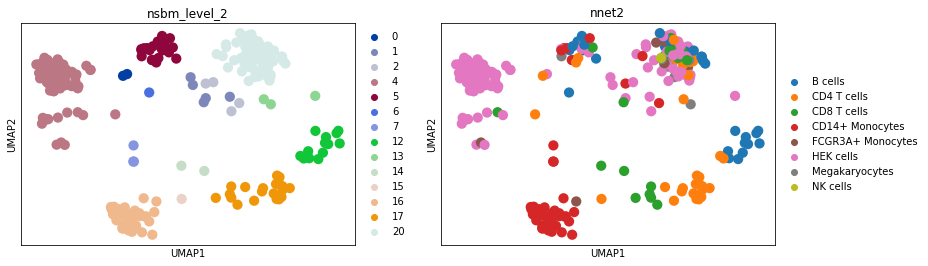

0.43196266125651317

In [30]:
M=adatam.uns['nsbm']['cell_affinity']['2']
adatam.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam[adatam.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])
subdata=adatam[adatam.obs.max_u < 1e-100]
sklearn.metrics.adjusted_mutual_info_score(subdata.obs.nsbm_level_2, subdata.obs.nnet2)

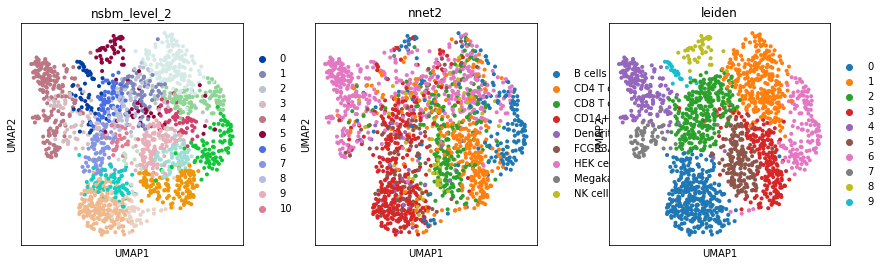

In [28]:
sc.pl.umap(adatam, color=['nsbm_level_2','nnet2','leiden'])

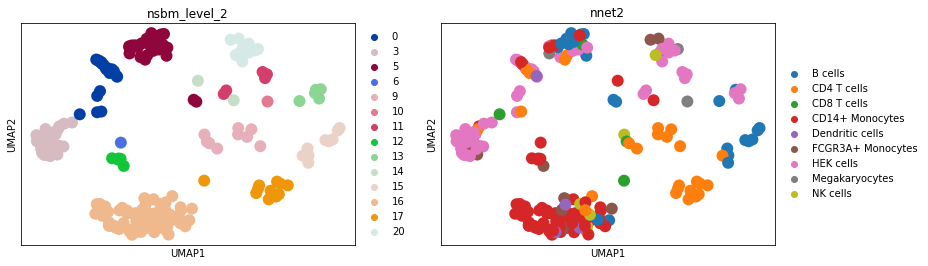

In [8]:
M=adatam2.uns['nsbm']['cell_affinity']['2']
adatam2.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam2[adatam2.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

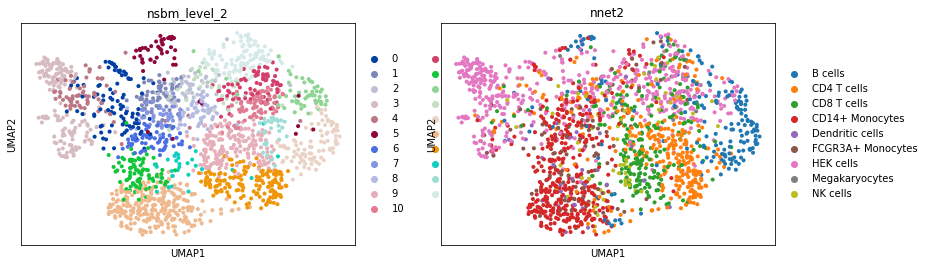

In [7]:
sc.pl.umap(adatam2, color=['nsbm_level_2','nnet2'])

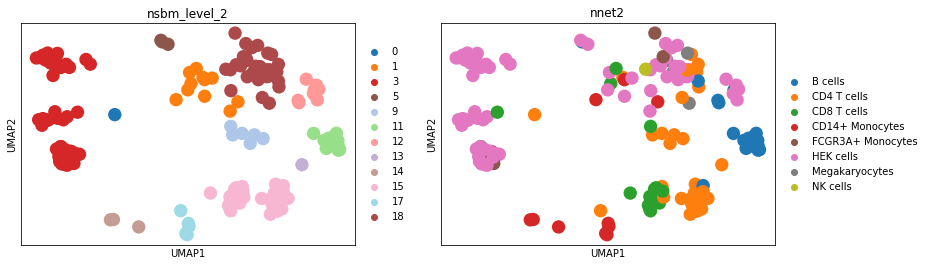

In [10]:
M=adatam3.uns['nsbm']['cell_affinity']['2']
adatam3.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam3[adatam3.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

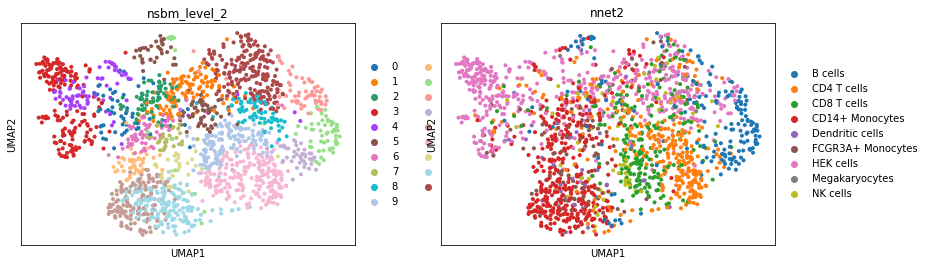

In [9]:
sc.pl.umap(adatam3, color=['nsbm_level_2','nnet2'])

In [11]:
sum(adatam.uns['nsbm']['stats']['level_entropy'])

132139.5167973067

In [12]:
sum(adatam2.uns['nsbm']['stats']['level_entropy'])

132045.06013905274

In [13]:
sum(adatam3.uns['nsbm']['stats']['level_entropy'])

132140.85941370288

In [14]:
ciao2=adatam2[adatam2.obs.max_u < 1e-100]

In [15]:
ciao2

View of AnnData object with n_obs × n_vars = 209 × 9081 
    obs: 'nnet2', 'percent_mito', 'n_counts', 'n_genes', 'leiden', 'nsbm_level_1', 'nsbm_level_2', 'nsbm_level_3', 'nsbm_level_4', 'nsbm_level_5', 'nsbm_level_6', 'nsbm_level_7', 'nsbm_level_8', 'nsbm_level_9', 'max_u'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'neighbors', 'nsbm', 'pca', 'umap', 'nsbm_level_2_colors', 'nnet2_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [16]:
ciao1=adatam[adatam.obs.max_u < 1e-100]

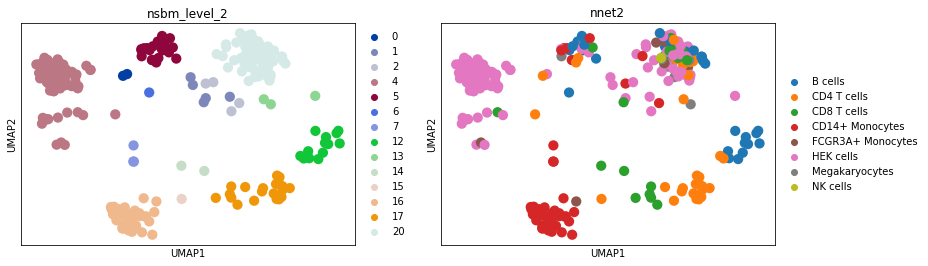

In [17]:
sc.pl.umap(ciao1, color=['nsbm_level_2','nnet2'])

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.tl.rank_genes_groups(ciao1, groupby='nsbm_level_2', method='logreg',max_iter=500)

Trying to set attribute `.uns` of view, copying.


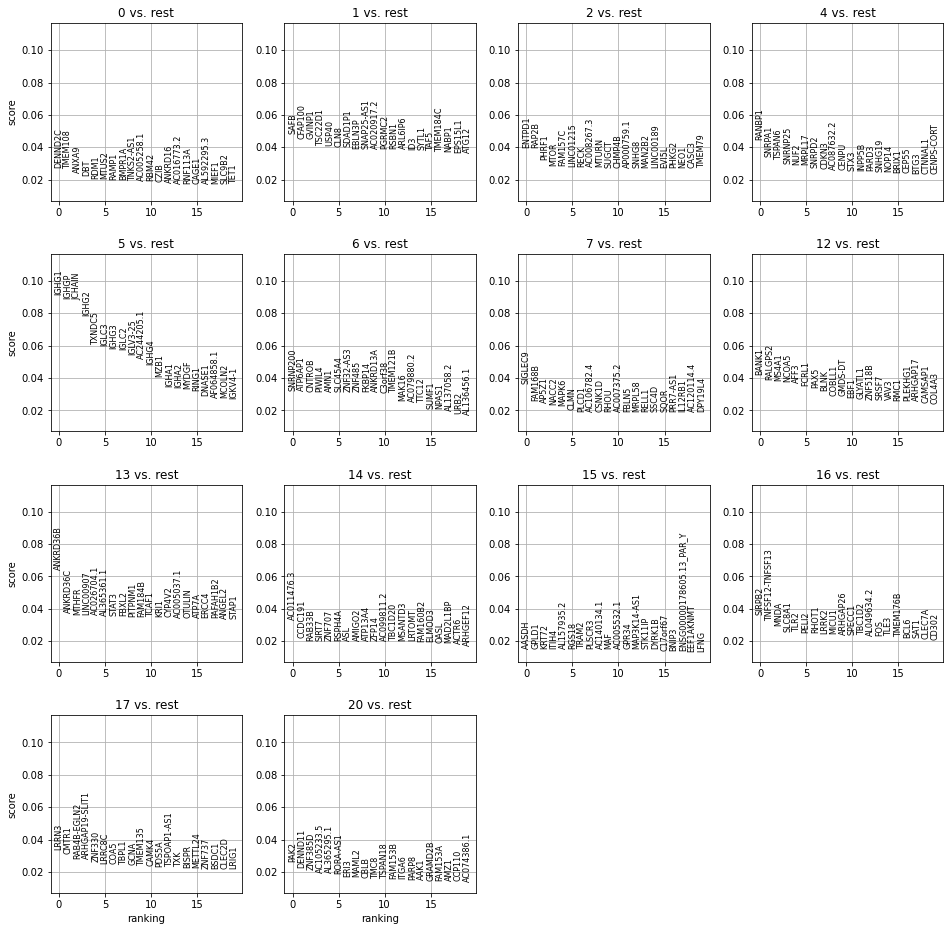

In [19]:
rcParams['figure.figsize'] = 4,4
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(ciao1)

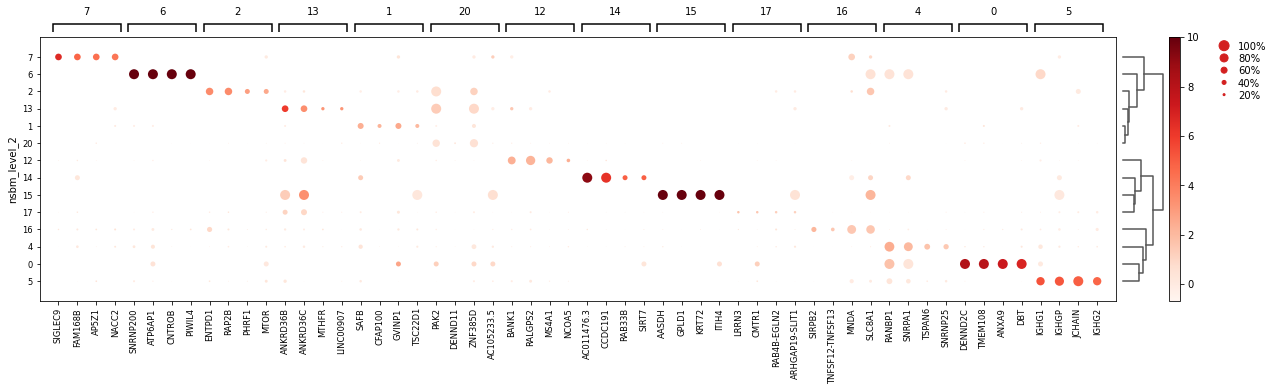

In [20]:
sc.pl.rank_genes_groups_dotplot(ciao1, n_genes=4)

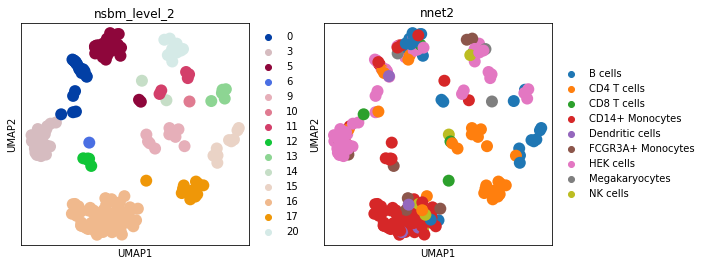

In [21]:
sc.pl.umap(ciao2, color=['nsbm_level_2','nnet2'])

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.tl.rank_genes_groups(ciao2, groupby='nsbm_level_2', method='logreg',max_iter=500)

Trying to set attribute `.uns` of view, copying.


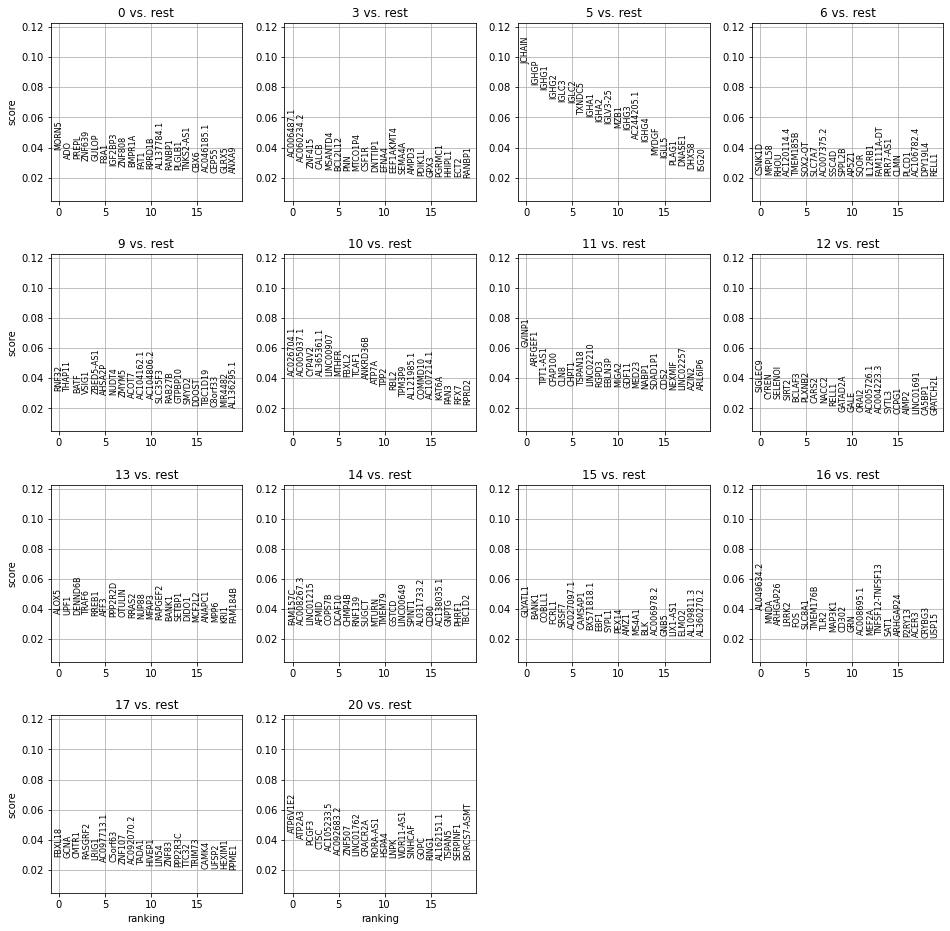

In [23]:
rcParams['figure.figsize'] = 4,4
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(ciao2)

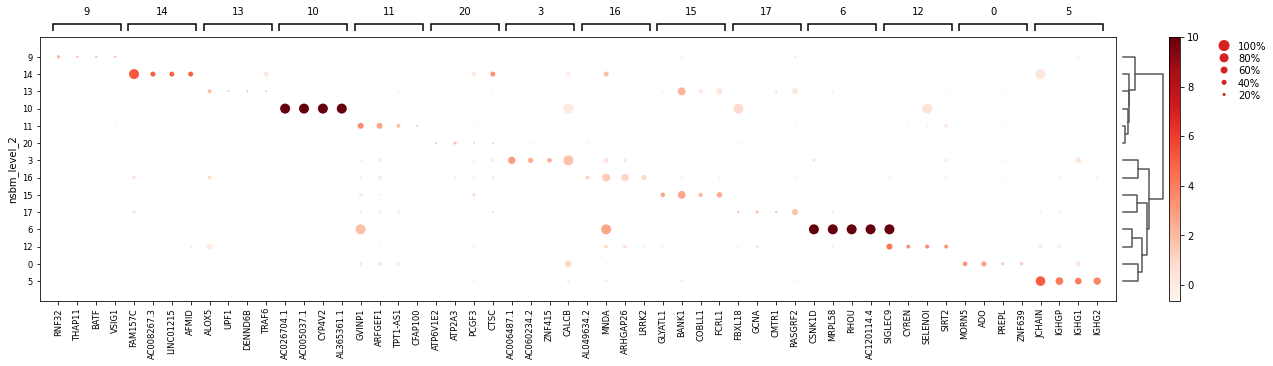

In [24]:
sc.pl.rank_genes_groups_dotplot(ciao2, n_genes=4)

In [25]:
ciao1.uns['rank_genes_groups']['names']['17']

array(['LRRN3', 'CMTR1', 'RAB4B-EGLN2', 'ARHGAP19-SLIT1', 'ZNF330',
       'LRRC8C', 'COA5', 'TBPL1', 'GCNA', 'TMEM135', 'CAMK4', 'PDS5A',
       'TSPOAP1-AS1', 'TXK', 'BISPR', 'METTL24', 'ZNF737', 'BSDC1',
       'CLEC2D', 'LRIG1', 'WDR36', 'OR1X5P', 'PRKCH', 'HIVEP1', 'STARD4',
       'ZNF562', 'CCDC22', 'ZNF83', 'PRKCQ', 'LIN54', 'PCGF5', 'DIP2B',
       'TDP1', 'TSHZ2', 'LINC02536', 'NIPAL3', 'AC020656.2', 'TOR1B',
       'TADA1', 'CRIPT', 'ANKRD44', 'IL2RB', 'SLC25A28', 'FBXL18',
       'USHBP1', 'THEMIS', 'TNIK', 'PSMD6-AS2', 'CGRRF1', 'AC009120.2',
       'LINC00243', 'KLHL32', 'RFXANK', 'CD247', 'LEF1', 'TFIP11',
       'GTF2H1', 'PHYH', 'SKA2', 'CFAP97', 'ANKZF1', 'MAP4K2', 'IFITM2',
       'RCL1', 'ANO9', 'RASGRF2', 'CYP2F1', 'BRMS1', 'SGSM1',
       'AC074386.1', 'ANTXRLP1', 'KCNG2', 'CNTRL', 'TTC38', 'RPRD2',
       'EPB41', 'TTC32', 'AC092944.1', 'ARAF', 'LIX1L-AS1', 'ANKRD36C',
       'AC074032.1', 'AL136962.1', 'RPAP2', 'FXYD5', 'AC008537.1',
       'BTBD9', 'LRIF1', 'DL

In [26]:
print(ciao2.uns['rank_genes_groups']['names']['17'])

['FBXL18' 'GCNA' 'CMTR1' 'RASGRF2' 'LRIG1' 'AC097713.1' 'C5orf63' 'ZNF107'
 'AC092070.2' 'TADA1' 'HIVEP1' 'LIN54' 'ZNF83' 'PPP2R3C' 'TTC32' 'TRIM73'
 'CAMK4' 'UFSP2' 'HEXIM1' 'PPME1' 'MCCC1' 'TSHZ2' 'ALDH16A1' 'APTX' 'PECR'
 'PKIA' 'ANXA6' 'ZNF430' 'IQCG' 'ZNF23' 'LRIF1' 'INTS2' 'LINC02536'
 'AC008892.1' 'GTF2H1' 'TOM1L2' 'CNTRL' 'PNKP' 'ARHGAP19-SLIT1' 'PRKCH'
 'COA5' 'ENOPH1' 'GALK2' 'CASK' 'FDX1' 'AC093423.2' 'ZNF330' 'AC008537.1'
 'SYNJ1' 'NSUN5P2' 'WDR53' 'LAMTOR3' 'LRRC8C' 'INPP4B' 'AC074032.1'
 'RAB4B-EGLN2' 'DHRS1' 'PCGF5' 'ANK3' 'CLEC2D' 'ERCC6L2' 'MED30' 'MDS2'
 'FOXRED1' 'SLC9B1' 'TMEM135' 'KLHL32' 'GPBP1' 'SACS' 'TNIK' 'ZBTB43'
 'RPRD2' 'TAF9B' 'IATPR' 'ABLIM1' 'CD247' 'MEPCE' 'SLC30A9' 'AC087854.1'
 'TC2N' 'NEPRO' 'H2AJ' 'ETFDH' 'PCDH12' 'ZNF331' 'TIMD4' 'AC001226.2'
 'PDS5A' 'PJA1' 'P2RX7' 'AC009120.2' 'MRPL2' 'SERINC5' 'RAI14' 'MTHFD2L'
 'HAUS8' 'GFPT1' 'LINC02762' 'AC099850.3' 'ZFYVE21']


In [27]:
for x in ciao2.uns['rank_genes_groups']['names']['15']:
    print(x)

GLYATL1
BANK1
COBLL1
FCRL1
SRSF7
AC027097.1
CAMSAP1
BX571818.1
EBF1
SYPL1
PEX14
AMZ1
MS4A1
BLK
AC006978.2
GNB5
LIX1-AS1
ELMO2
AL109811.3
AL360270.2
ST6GAL1
CD22
GOLGA1
RALGPS2
RNF216
AFF3
SH3BP5
MARK2
STAP1
AC003006.1
CECR7
SLC2A1
JADE3
ABL1
KLHL3
TRUB1
ZBTB21
PAX5
P2RX5-TAX1BP3
COX19
MFAP3
LINC01135
NCOA5
IGLV10-54
CDCA7L
BLNK
NDUFAF6
TERF2
ENSG00000225541.1
CREB1
WDR53
IGLL5
CNBD2
WDR25
KIAA0586
FRA10AC1
ENSG00000270898.5
POLI
APOL6
AP005018.2
AC007569.1
C1QBP
AP000866.2
EMBP1
COL4A3
RGMB
MRPS23
TMEM168
ZNF331
ENSG00000255767.1
TGFBR2
COX10-AS1
PIGHP1
RALGDS
C14orf93
PSMD3
MOB3B
AL139353.1
GMDS-DT
RGPD4
CPED1
SNHG10
PRKD1
TCAF1P1
PLEKHG5
RUBCNL
NSUN2
TRIM62
AUTS2
AC093525.2
GPM6A
UBOX5
TYSND1
AC010320.4
AKT3
IGHD
ZBED5-AS1
ZNF286A
SOX5
URGCP
